# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
!pip install plot-keras-history
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import seaborn as sns
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from plot_keras_history import plot_history
from sklearn.metrics import confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 321 kB 19.4 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.36-py3-none-any.whl size=9236 sha256=9aaa93db1316ae4fa455f4ef5604d1f258c084b3f01f4429275d4c62455ce77e
  Stored in directory: /root/.cache/pip/wheels/ca/73/ed/41022b42c1d9ce60a8a2ebb71f042c7f895673760404d39fd7
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.43-py3-none-any.whl size=319231 sha256=f63ba1783e7cb1237c27208287050bbbfb96a998c18c80910c0e0835e1f0e706
  Stored in directory: /root/.cache/pip/wheels/71/d5/dd/d4893fffb9dcb9494de70478ab9728ae5d105f7d849a90e81a
  Created wheel for compress-json: filename=compress_json-1.0.7-py3-none-any.whl size=5233 sha256=a0ef9eff4fa5448e67ebe705d335a567a7eb57db3a1b3626d265e62e8a4e1ae2
  Stored in directory: /root/.cache/pip/wheels/6d/7e/13/0e370d719528969d430498ca952417324595d116776840b279
Successfu

In [ ]:
a = [1,2,3,4]
b = [8,7,6,5]
f, x = shuffle(a, b)
f, x

([3, 1, 4, 2], [6, 8, 5, 7])

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

## NYT news Data

In this cell we try to use the data which we prepared in previos phase of project. it is an news dataset from New York Times news different section.

In [12]:
nyt_data_path = '/content/drive/MyDrive/nlp/cleaned_news.csv'

df = pd.read_csv(nyt_data_path)
df.head()

,news,category
0,people microdosing mental health work scientis...,well
1,new versatile power suit whether doublebreaste...,t magazine
2,background suspect buffalo shooting appears pa...,u.s.
3,savannah home meld georgian architecture flair...,t magazine
4,alzheimer disease marriage amy bloom midlife l...,books


In [13]:
nyt_news = df['news'].values
nyt_cat = df['category'].values
nyt_news.shape, nyt_cat.shape

((14905,), (14905,))

In [14]:
nyt_category_str = np.unique(nyt_cat)
cat_to_index = {val:idx for idx, val in enumerate(nyt_category_str)}
NYT_CLASS_NUMBERS = len(nyt_category_str)
print(cat_to_index), len(nyt_category_str)

{'arts': 0, 'books': 1, 'briefing': 2, 'business': 3, 'climate': 4, 'corrections': 5, 'en español': 6, 'fashion': 7, 'food': 8, 'health': 9, 'magazine': 10, 'movies': 11, 'new york': 12, 'obituaries': 13, 'opinion': 14, 'parenting': 15, 'podcasts': 16, 'real estate': 17, 'science': 18, 'sports': 19, 'style': 20, 't magazine': 21, 'technology': 22, 'the learning network': 23, 'the upshot': 24, 'theater': 25, 'times insider': 26, 'today’s paper': 27, 'travel': 28, 'u.s.': 29, 'well': 30, 'world': 31, 'your money': 32}


(None, 33)

In [15]:
nyt_y = np.array([cat_to_index.get(key) for key in nyt_cat])
nyt_y.shape 

(14905,)

In [ ]:
np.unique(nyt_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

` DATA Visualization `

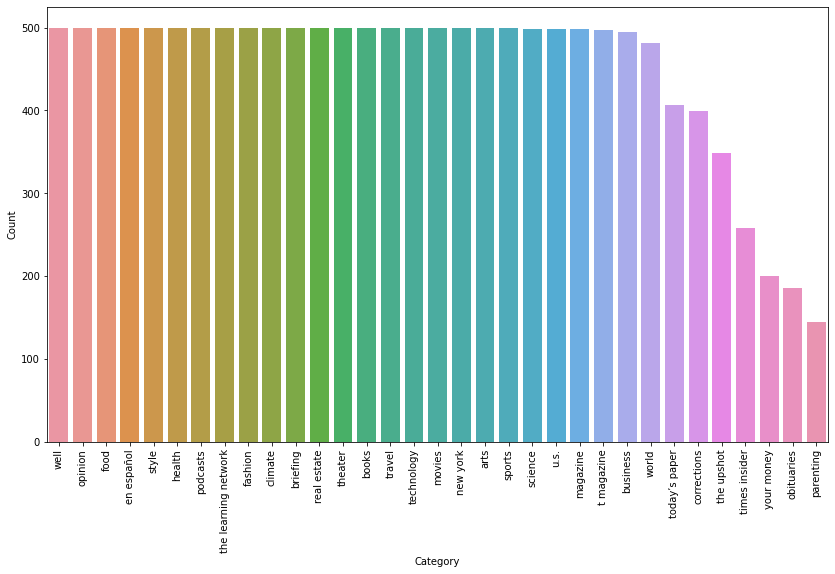

In [ ]:
plt.figure(figsize=(14,8))
count = df.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [16]:
## The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000

## Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 150

## This is fixed.
EMBEDDING_DIM = 100


tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# tokenizer.fit_on_texts(news_con)

## for nyt
tokenizer.fit_on_texts(nyt_news)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 29160 unique tokens.


In [17]:
## for NYT
X = tokenizer.texts_to_sequences(nyt_news)

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

## NYT
y = tf.keras.utils.to_categorical(nyt_y)

print('Shape of data input tensor:', X.shape)
print('Shape of target class tensor:', y.shape)

Shape of data input tensor: (14905, 150)
Shape of target class tensor: (14905, 33)


## Ag News

This cell is for using AG news which you can find it data in [kaggle](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset).

In [3]:
TRAIN_DATA_PATH = '/content/drive/MyDrive/Ag_news_dataset/cleaned_train_data.csv'
TEST_DATA_PATH = '/content/drive/MyDrive/Ag_news_dataset/cleaned_test_data.csv'

df = pd.read_csv(TRAIN_DATA_PATH)
df_test = pd.read_csv(TEST_DATA_PATH)
df.head()

,Unnamed: 0,description,category
0,0,reuters shortsellers wall street dwindlingband...,3
1,1,reuters private investment firm carlyle groupw...,3
2,2,reuters soaring crude price plus worriesabout ...,3
3,3,reuters authority halted oil exportflows main ...,3
4,4,afp tearaway world oil price toppling record s...,3


we seperate the content of the news and it's category.

In [4]:
news_train = df['description'].tolist()
news_test = df_test['description'].tolist()

categories_train = df['category'].tolist()
categories_test = df_test['category'].tolist()

print(len(news_train), len(news_test))
print(len(categories_train), len(categories_test))


120000 7600
120000 7600


here we tokenize each news by whitespaces.  
`NOTE : Our data was preprocessed before in the previous phase of project` 

In [5]:
tokenized_news = [a.split(' ') for a in news_train]
print(tokenized_news[10])

['new', 'york', 'reuters', 'soaring', 'crude', 'price', 'plus', 'worry', 'economy', 'outlook', 'earnings', 'expected', 'hang', 'stock', 'market', 'next', 'week', 'depth', 'summer', 'doldrums']


`this cell is just for AG news dataset`  
in here we concatenate train and test data to get the whole of data and vectorize seprate it for our model.

In [6]:
# concatenate news train and test
news_con = np.array(news_train + news_test)
categories_con = np.array(categories_train + categories_test, dtype=np.float32)

news_con.shape, categories_con.shape, categories_train[:120000] == categories_con[:120000]

((127600,), (127600,), array([ True,  True,  True, ...,  True,  True,  True]))

we shuffle our data with sklearn library

In [7]:
# shuffle data
news_con, categories_con = shuffle(news_con, categories_con, random_state=13)


in the below cell you can check out the visualization of our AG news data.

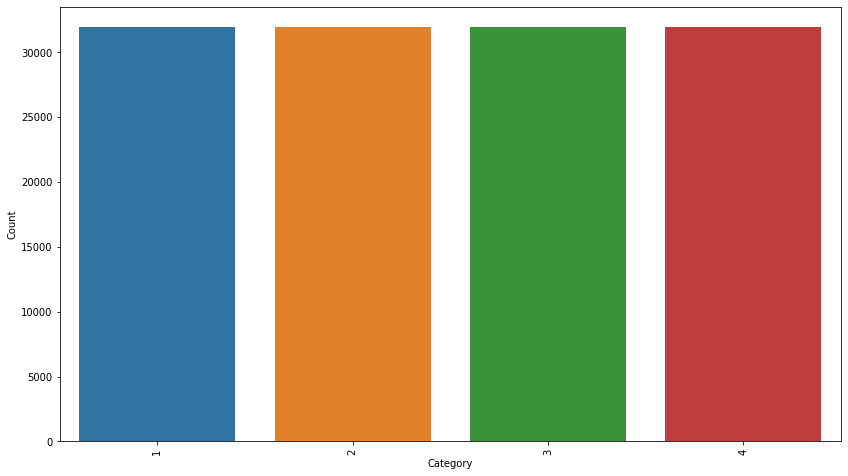

In [ ]:
df_all = pd.concat([df, df_test])
plt.figure(figsize=(14,8))
count = df_all.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90);

 in the following cell, we use keras library to tokenize our news and create vectorization from them. The Tokenizer class allows to vectorize a text corpus and after we use this vectorezie to a embedding layer.

In [8]:
## The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000

## Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250

## This is fixed.
EMBEDDING_DIM = 100


tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(news_con)

## for Ag
tokenizer.fit_on_texts(news_con)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 80123 unique tokens.


1. In the below cell, we convert each news to its vectorize representation.  
2. also we add 0 padding to reach the maximum size of a sentence.
3. next we convert the true labels to the categorical one since we have classification task and we are going to use binary cross entropy for classification. 

In [9]:
X = tokenizer.texts_to_sequences(news_con)

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

class_num = len(np.unique(categories_con))

## conver the target class co categorical.
y = tf.keras.utils.to_categorical(categories_con - 1, num_classes= class_num)

print('Shape of data input tensor:', X.shape)
print('Shape of target class tensor:', y.shape)


Shape of data input tensor: (127600, 250)
Shape of target class tensor: (127600, 4)


## Break News Category Dataset

This data set is taken from [kaggle](https://www.kaggle.com/datasets/rmisra/news-category-dataset)

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d rmisra/news-category-dataset

 35% 9.00M/25.4M [00:00<00:00, 65.6MB/s]
100% 25.4M/25.4M [00:00<00:00, 133MB/s] 


In [ ]:
! unzip news-category-dataset.zip

Archive:  news-category-dataset.zip
  inflating: News_Category_Dataset_v2.json  


In [ ]:
! cp News_Category_Dataset_v2.json /content/drive/MyDrive/nlp/

### visualize data

In [ ]:
data_path = '/content/drive/MyDrive/nlp/News_Category_Dataset_v2.json'
df = pd.read_json(data_path, lines=True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
df['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

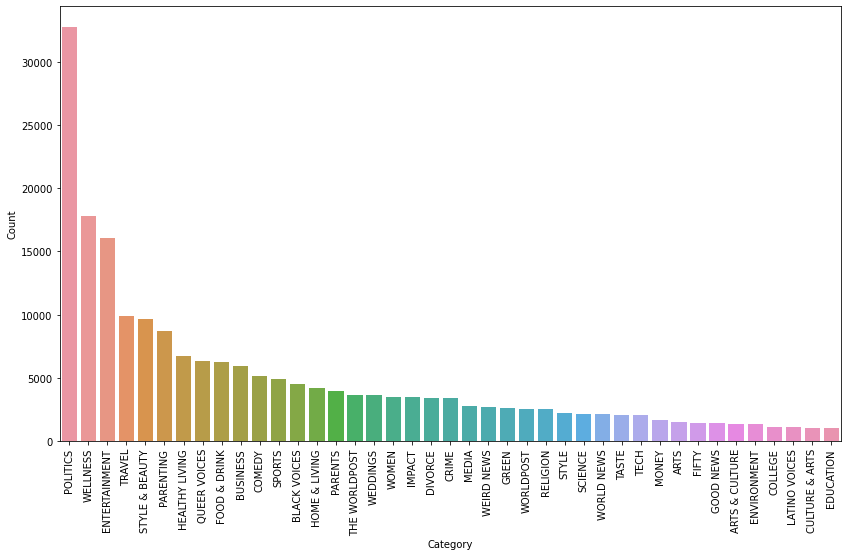

In [ ]:
plt.figure(figsize=(14,8))
count = df.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [ ]:
LABEL_USED_COUNT = 12
label_used = df.category.value_counts().index[:LABEL_USED_COUNT]
print('label used for prediction the {}'.format(label_used))

label used for prediction the Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK',
       'BUSINESS', 'COMEDY', 'SPORTS'],
      dtype='object')


In [ ]:
df['text'] = df['headline'] +'. ' +df['short_description']
df_v2 = df[['text', 'category']]
df_v2.head()

,text,category
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT


In [ ]:
df_top_category = df_v2[df_v2['category'].isin(label_used)]
df_top_category['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
Name: category, dtype: int64

In [ ]:
df_top_category.to_csv('/content/drive/MyDrive/nlp/Breaking_News_Top.csv')

In [21]:
## get the cleaned data
df_clean = pd.read_csv('/content/drive/MyDrive/nlp/cleaned_Breaking_News_Top.csv')
df_clean.head()

,Unnamed: 0,news,category
0,0,smith join diplo nicky jam world cup official ...,ENTERTAINMENT
1,1,hugh grant marries first time age actor longti...,ENTERTAINMENT
2,2,jim carrey blast castrato adam schiff democrat...,ENTERTAINMENT
3,3,julianna margulies us donald trump poop bag pi...,ENTERTAINMENT
4,4,morgan freeman devastated sexual harassment cl...,ENTERTAINMENT


In [22]:
byn_news = df_clean['news'].values
byn_cat = df_clean['category'].values
byn_news.shape, byn_cat.shape

((130053,), (130053,))

In [23]:
byn_category_str = np.unique(byn_cat)
cat_to_index = {val:idx for idx, val in enumerate(byn_category_str)}
BYN_CLASS_NUMBERS = len(byn_category_str)
print(cat_to_index), len(byn_category_str)

{'BUSINESS': 0, 'COMEDY': 1, 'ENTERTAINMENT': 2, 'FOOD & DRINK': 3, 'HEALTHY LIVING': 4, 'PARENTING': 5, 'POLITICS': 6, 'QUEER VOICES': 7, 'SPORTS': 8, 'STYLE & BEAUTY': 9, 'TRAVEL': 10, 'WELLNESS': 11}


(None, 12)

In [24]:
byn_y = np.array([cat_to_index.get(key) for key in byn_cat])
byn_y.shape 

(130053,)

In [25]:
## The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000

## Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 150

## This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

## for byn
tokenizer.fit_on_texts(byn_news)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 75608 unique tokens.


In [26]:
## for BYN
X = tokenizer.texts_to_sequences(byn_news)

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

## BYN
y = tf.keras.utils.to_categorical(byn_y)

print('Shape of data input tensor:', X.shape)
print('Shape of target class tensor:', y.shape)

Shape of data input tensor: (130053, 150)
Shape of target class tensor: (130053, 12)


## Create ataset


here we splite the train and the test data which `0.2` of them are for test-data and the rest is for train-data.

In [27]:
# seperate the test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(104042, 150) (104042, 12)
(26011, 150) (26011, 12)


# Section `2`

## build model

### For AG news

here we build our model with sequential and embedding layers.
also we use some dropout to almost make sure that we won't face overfitting. 

In [ ]:
from keras.layers.core.dropout import Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, recurrent_regularizer='l1_l2')),
    Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

`
{
  "optimizer": "adam",
  "loss function": "binary cross entropy",
  "epochs": 10
}
`

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 250, 100)          2000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_13 (Bidirecti  (None, 128)              84480     
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 4)                

Train our model with batch_size 512 and validation data.

In [ ]:
history = model.fit(X_train , Y_train, epochs=10,batch_size=512,
                    validation_data=(X_test, Y_test))

Epoch 1/10
200/200 [==============================] - 15s 63ms/step - loss: 3.9658 - accuracy: 0.6968 - val_loss: 0.2486 - val_accuracy: 0.8572
Epoch 2/10
200/200 [==============================] - 12s 61ms/step - loss: 0.1981 - accuracy: 0.8874 - val_loss: 0.1920 - val_accuracy: 0.8870
Epoch 3/10
200/200 [==============================] - 12s 59ms/step - loss: 0.1586 - accuracy: 0.9163 - val_loss: 0.1846 - val_accuracy: 0.8961
Epoch 4/10
200/200 [==============================] - 12s 59ms/step - loss: 0.1386 - accuracy: 0.9305 - val_loss: 0.1842 - val_accuracy: 0.8960
Epoch 5/10
200/200 [==============================] - 12s 58ms/step - loss: 0.1252 - accuracy: 0.9395 - val_loss: 0.1906 - val_accuracy: 0.8948
Epoch 6/10
200/200 [==============================] - 12s 58ms/step - loss: 0.1147 - accuracy: 0.9467 - val_loss: 0.2012 - val_accuracy: 0.8942
Epoch 7/10
200/200 [==============================] - 12s 58ms/step - loss: 0.1061 - accuracy: 0.9522 - val_loss: 0.2100 - val_accuracy:

In [ ]:
# save model
model.save('/content/drive/MyDrive/Ag_news_dataset/baseline_model.h5')
print('.... model save ...')


.... model save ...


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd61d30ad0>,
       dtype=object))

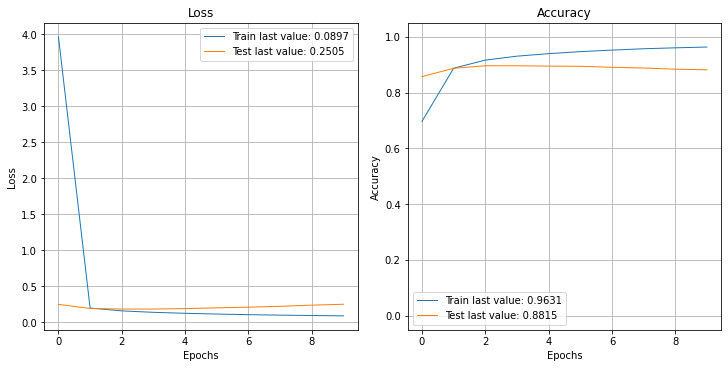

In [ ]:
## plot the accuracy and loss
plot_history(histories=history)

now we load our model from where the model is saved and plot the confusion matrix.


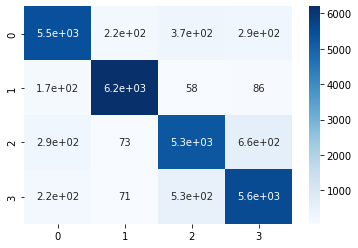

In [11]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Ag_news_dataset/baseline_model.h5')
y_pred = new_model.predict(X_test)

#Get the confusion matrix
cf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cf_matrix, cmap="Blues", annot=True)

### for NYT

In [ ]:
from keras.layers.core.dropout import Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True, recurrent_regularizer='l1_l2')),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, recurrent_regularizer='l1_l2')),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NYT_CLASS_NUMBERS)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          2000000   
                                                                 
 bidirectional_10 (Bidirecti  (None, 150, 128)         84480     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)               

In [ ]:
history = model.fit(X_train , Y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, Y_test))

Epoch 1/20
373/373 [==============================] - 19s 38ms/step - loss: 3.1524 - accuracy: 0.0336 - val_loss: 0.1838 - val_accuracy: 0.0584
Epoch 2/20
373/373 [==============================] - 13s 34ms/step - loss: 0.1952 - accuracy: 0.0586 - val_loss: 0.1724 - val_accuracy: 0.1647
Epoch 3/20
373/373 [==============================] - 12s 31ms/step - loss: 0.1810 - accuracy: 0.1297 - val_loss: 0.1599 - val_accuracy: 0.2992
Epoch 4/20
373/373 [==============================] - 11s 30ms/step - loss: 0.1660 - accuracy: 0.2315 - val_loss: 0.1469 - val_accuracy: 0.3804
Epoch 5/20
373/373 [==============================] - 11s 30ms/step - loss: 0.1505 - accuracy: 0.3313 - val_loss: 0.1397 - val_accuracy: 0.4452
Epoch 6/20
373/373 [==============================] - 11s 30ms/step - loss: 0.1376 - accuracy: 0.4296 - val_loss: 0.1365 - val_accuracy: 0.4549
Epoch 7/20
373/373 [==============================] - 11s 30ms/step - loss: 0.1263 - accuracy: 0.5072 - val_loss: 0.1356 - val_accuracy:

In [ ]:
# save model
model.save('/content/drive/MyDrive/Ag_news_dataset/baseline_model_nyt.h5')
print('.... model save ...')


.... model save ...


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde0979af10>,
       dtype=object))

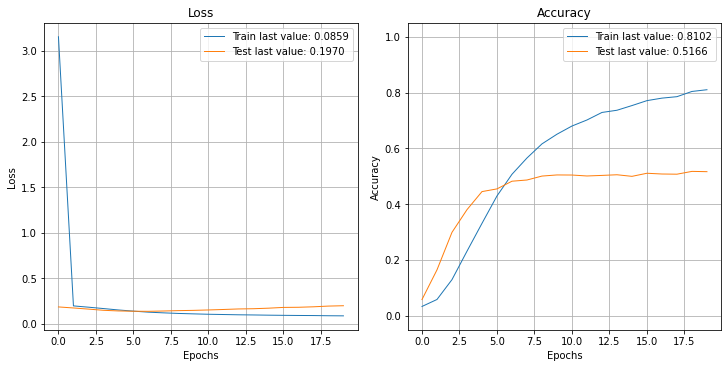

In [ ]:
## plot the accuracy and loss
plot_history(histories=history)

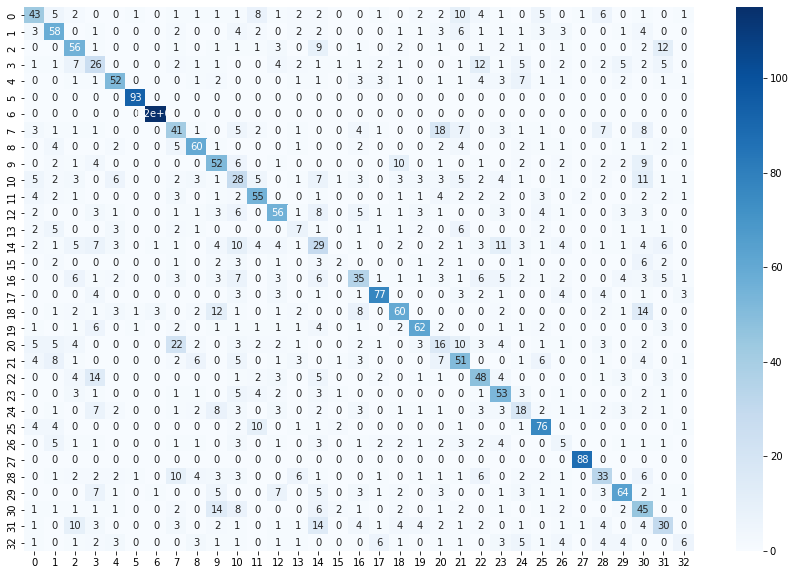

In [20]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Ag_news_dataset/baseline_model_nyt.h5')
y_pred = new_model.predict(X_test)

#Get the confusion matrix
plt.figure(figsize = (15,10))
cf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cf_matrix, cmap="Blues", annot=True)

### for BYN

In [ ]:
from keras.layers.core.dropout import Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,  return_sequences=True, recurrent_regularizer='l1_l2')),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, recurrent_regularizer='l1_l2')),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(BYN_CLASS_NUMBERS)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 100)          2000000   
                                                                 
 bidirectional_8 (Bidirectio  (None, 150, 64)          34048     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [ ]:
history = model.fit(X_train , Y_train, epochs=10, batch_size=512,
                    validation_data=(X_test, Y_test))

Epoch 1/10
204/204 [==============================] - 15s 51ms/step - loss: 3.9047 - accuracy: 0.2480 - val_loss: 0.4004 - val_accuracy: 0.4163
Epoch 2/10
204/204 [==============================] - 9s 44ms/step - loss: 0.2461 - accuracy: 0.5064 - val_loss: 0.1709 - val_accuracy: 0.6116
Epoch 3/10
204/204 [==============================] - 9s 44ms/step - loss: 0.1673 - accuracy: 0.6554 - val_loss: 0.1411 - val_accuracy: 0.7153
Epoch 4/10
204/204 [==============================] - 9s 44ms/step - loss: 0.1395 - accuracy: 0.7418 - val_loss: 0.1347 - val_accuracy: 0.7452
Epoch 5/10
204/204 [==============================] - 9s 45ms/step - loss: 0.1249 - accuracy: 0.7830 - val_loss: 0.1324 - val_accuracy: 0.7515
Epoch 6/10
204/204 [==============================] - 9s 45ms/step - loss: 0.1151 - accuracy: 0.8072 - val_loss: 0.1336 - val_accuracy: 0.7521
Epoch 7/10
204/204 [==============================] - 9s 44ms/step - loss: 0.1075 - accuracy: 0.8251 - val_loss: 0.1366 - val_accuracy: 0.754

In [ ]:
model.save('/content/drive/MyDrive/Ag_news_dataset/baseline_model_byn.h5')
print('.... model save ...')


.... model save ...


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fddf8add190>,
       dtype=object))

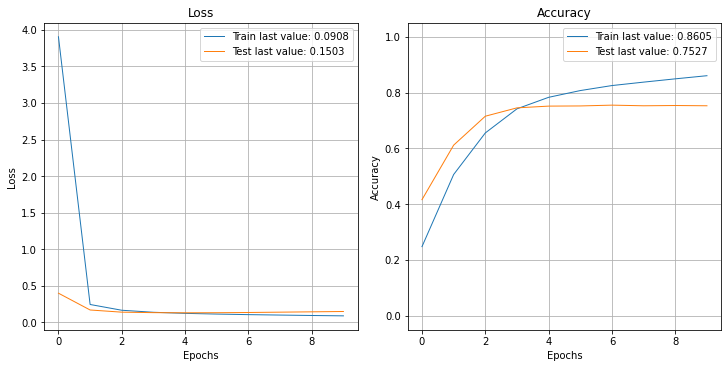

In [ ]:
## plot the accuracy and loss
plot_history(histories=history)

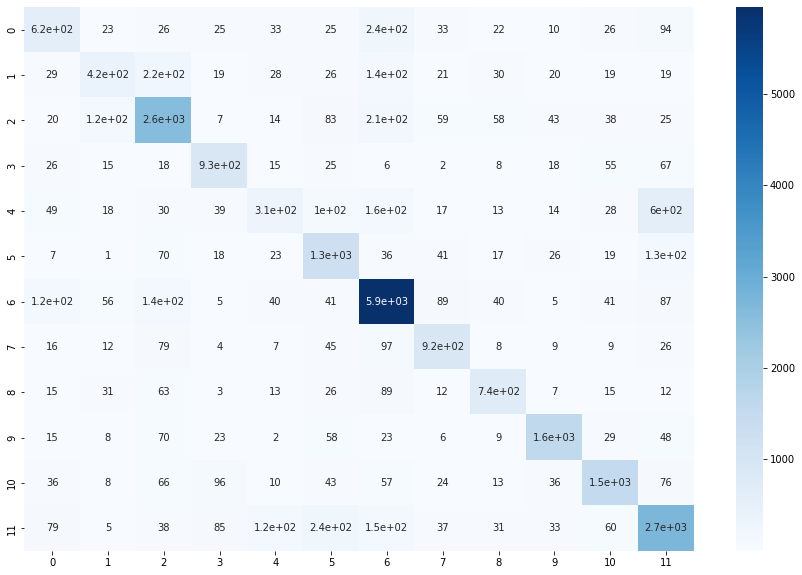

In [28]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Ag_news_dataset/baseline_model_byn.h5')
y_pred = new_model.predict(X_test)

#Get the confusion matrix
plt.figure(figsize = (15,10))
cf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cf_matrix, cmap="Blues", annot=True)